# Titanic Survival Exploration with Decision Trees
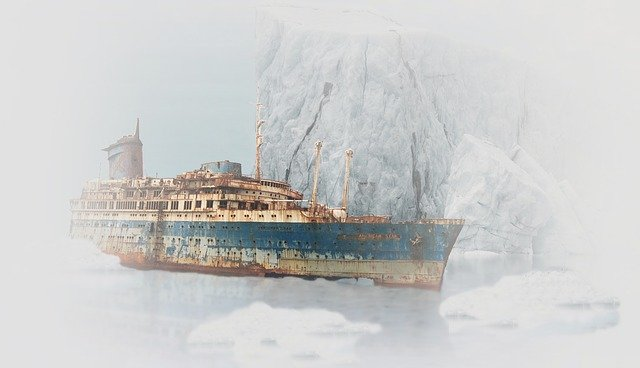
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set a random seed
import random
random.seed(42)

In [ ]:
# Load the dataset
data = pd.read_csv('../input/titantic-data/titanic_data.csv')

# Print the first few entries of the Titanic data
data.head()

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.  
Run the code cell below to remove **Survived** as a feature of the dataset and store it in `outcomes`.

In [ ]:
# Store 'Survived' feature into a new variable and remove it from the dataset
outcomes = data['Survived']
features = data.drop('Survived', axis=1)

# Preprocessing the data - one-hot encoding
We will use one-hot encoding technique and convert categorical into continous**

In [ ]:
features_encoded = pd.get_dummies(features)

In [ ]:
features_encoded = features_encoded.fillna(0.0)
features_encoded.head()

# Training the Model

 First, I'll split the data into training and testing sets.
 Then I'll train the model on the training set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, outcomes, test_size=0.2, random_state=42)

In [ ]:
# Import the classifier from sklearn
from sklearn.tree import DecisionTreeClassifier

# Define the classifier, and fit it to the data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Testing the model
We will calculate the accuracy over both training and testing set.

In [ ]:
# Making Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

From this, we can see that we are overfitting as we have high training and low testing accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': range(2,11),
    'min_samples_leaf': range(2,11),
    'min_samples_split': range(2,11)
}

grid_search = GridSearchCV(model, params)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Make predictions
# predict() on GridSearchCV picks the best model
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)